In [1]:
import pandas as pd

In [3]:
df = pd.read_csv("customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [5]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [6]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [7]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5])

In [8]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


In [ ]:
# Breaking Down Length of Stay into Long Stays and Short Stays Based on Avg Length of Stay in Above Step (17.0)

long_stays = df[df['length_of_stay'] >= 17].copy()
short_stays = df[df['length_of_stay']  <= 16].copy()
print("\nLong Stays (17+ days):")
print(long_stays['length_of_stay'].describe())

print("\nShort Stays (≤16 days):")
print(short_stays['length_of_stay'].describe())


Long Stays (17+ days):
count    25327.000000
mean        40.909938
std         40.235987
min         17.000000
25%         21.000000
50%         28.000000
75%         43.000000
max        778.000000
Name: length_of_stay, dtype: float64

Short Stays (≤16 days):
count    24673.000000
mean         4.705630
std          1.188074
min          0.000000
25%          4.000000
50%          5.000000
75%          6.000000
max          6.000000
Name: length_of_stay, dtype: float64


In [ ]:
# Creating a New Column "stay_type" to Categorize Bookings as "Long Stay" or "Short Stay"

df["stay_type"] = df["length_of_stay"].apply(
    lambda x: "Long Stay" if x >= 17 else "Short Stay"
)

df["stay_type"].value_counts()

stay_type
Long Stay     25327
Short Stay    24673
Name: count, dtype: int64

In [ ]:
# To Determine What Percentage of Bookings are Long Stays vs Short Stays

stay_percentages = df["stay_type"].value_counts(normalize=True) * 100
print(stay_percentages)


stay_type
Long Stay     50.654
Short Stay    49.346
Name: proportion, dtype: float64


In [ ]:
# Table of Percentages for Types of Bookings (Long Stay vs Short Stay)

stay_summary = (
    df["stay_type"]
    .value_counts(normalize=True)
    .mul(100)
    .round(2)
    .reset_index()
    .rename(columns={"index": "Stay Type", "stay_type": "Percentage"})
)

stay_summary

,Percentage,proportion
0,Long Stay,50.65
1,Short Stay,49.35


In [ ]:
# To Compare numeric columns based on stay type

df.groupby("stay_type")[["purchase_lead", "wants_extra_baggage", "wants_preferred_seat", "wants_in_flight_meals", "flight_duration", "booking_complete"]]

print(df.groupby("stay_type")[["purchase_lead", "wants_extra_baggage", "wants_preferred_seat", "wants_in_flight_meals", "flight_duration", "booking_complete"]].describe())

           purchase_lead                                                       \
                   count       mean        std  min   25%   50%    75%    max   
stay_type                                                                       
Long Stay        25327.0  83.246693  84.333368  0.0  22.0  54.0  115.0  704.0   
Short Stay       24673.0  86.679163  96.298991  0.0  20.0  49.0  116.0  867.0   

           wants_extra_baggage            ... flight_duration       \
                         count      mean  ...             75%  max   
stay_type                                 ...                        
Long Stay              25327.0  0.788723  ...            8.83  9.5   
Short Stay             24673.0  0.545657  ...            8.58  9.5   

           booking_complete                                               
                      count      mean       std  min  25%  50%  75%  max  
stay_type                                                                 
Long Stay         

In [53]:
import matplotlib.pyplot as plt

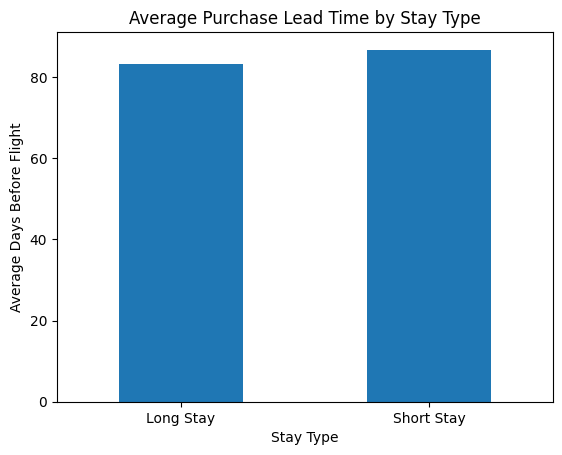

In [54]:
avg_lead = df.groupby("stay_type")["purchase_lead"].mean()

plt.figure()
avg_lead.plot(kind="bar")
plt.title("Average Purchase Lead Time by Stay Type")
plt.xlabel("Stay Type")
plt.ylabel("Average Days Before Flight")
plt.xticks(rotation=0)
plt.show()

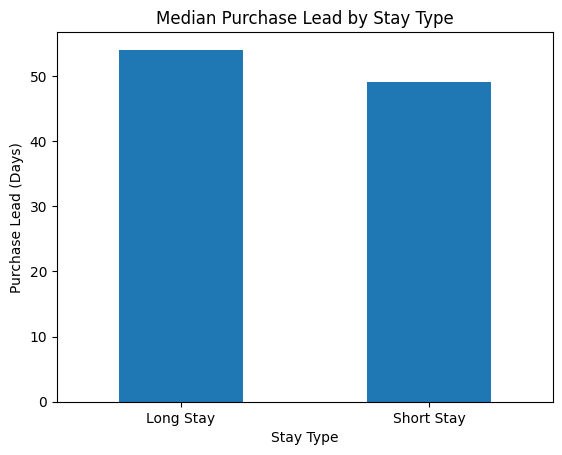

In [88]:
median_duration = df.groupby("stay_type")["purchase_lead"].median()

plt.figure()
median_duration.plot(kind="bar")
plt.title("Median Purchase Lead by Stay Type")
plt.xlabel("Stay Type")
plt.ylabel("Purchase Lead (Days)")
plt.xticks(rotation=0)
plt.show()

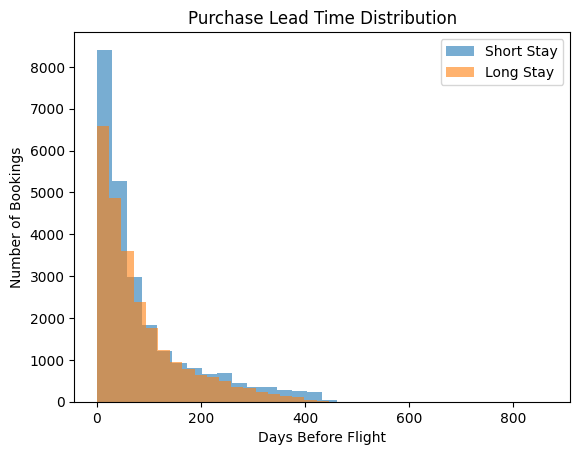

In [89]:
plt.figure()
plt.hist(
    df[df["stay_type"] == "Short Stay"]["purchase_lead"],
    bins=30,
    alpha=0.6,
    label="Short Stay"
)

plt.hist(
    df[df["stay_type"] == "Long Stay"]["purchase_lead"],
    bins=30,
    alpha=0.6,
    label="Long Stay"
)

plt.title("Purchase Lead Time Distribution")
plt.xlabel("Days Before Flight")
plt.ylabel("Number of Bookings")
plt.legend()
plt.show()


<Figure size 640x480 with 0 Axes>

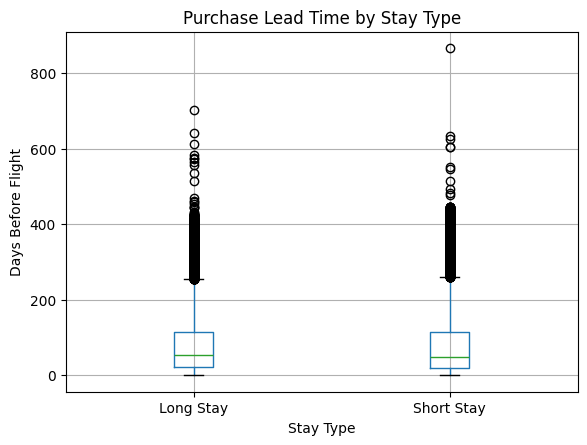

In [90]:
plt.figure()
df.boxplot(
    column="purchase_lead",
    by="stay_type"
)

plt.title("Purchase Lead Time by Stay Type")
plt.suptitle("")  # removes default subtitle
plt.xlabel("Stay Type")
plt.ylabel("Days Before Flight")
plt.show()

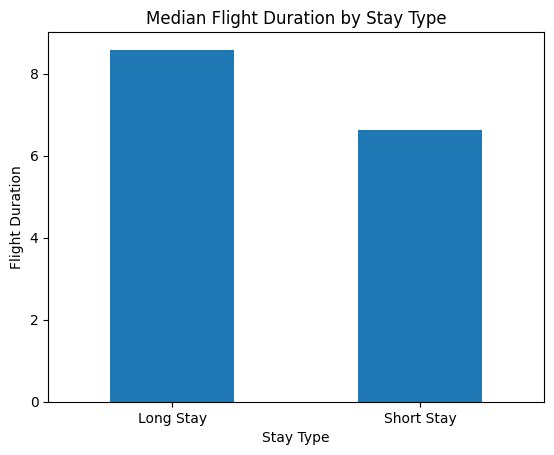

In [55]:
median_duration = df.groupby("stay_type")["flight_duration"].median()

plt.figure()
median_duration.plot(kind="bar")
plt.title("Median Flight Duration by Stay Type")
plt.xlabel("Stay Type")
plt.ylabel("Flight Duration")
plt.xticks(rotation=0)
plt.show()

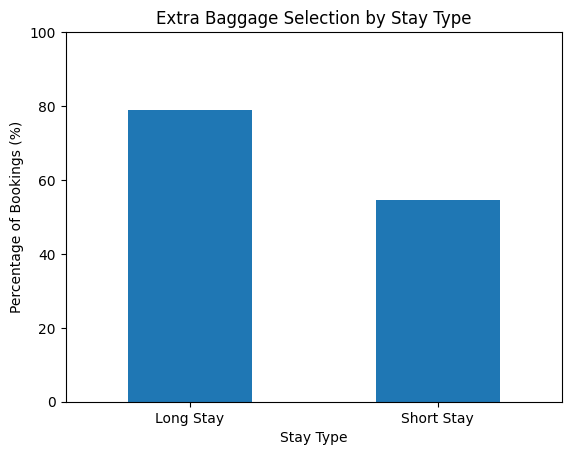

In [56]:
baggage_pct = (
    df.groupby("stay_type")["wants_extra_baggage"]
      .mean()
      .mul(100)
)

plt.figure()
baggage_pct.plot(kind="bar")
plt.title("Extra Baggage Selection by Stay Type")
plt.xlabel("Stay Type")
plt.ylabel("Percentage of Bookings (%)")
plt.xticks(rotation=0)
plt.ylim(0, 100)
plt.show()

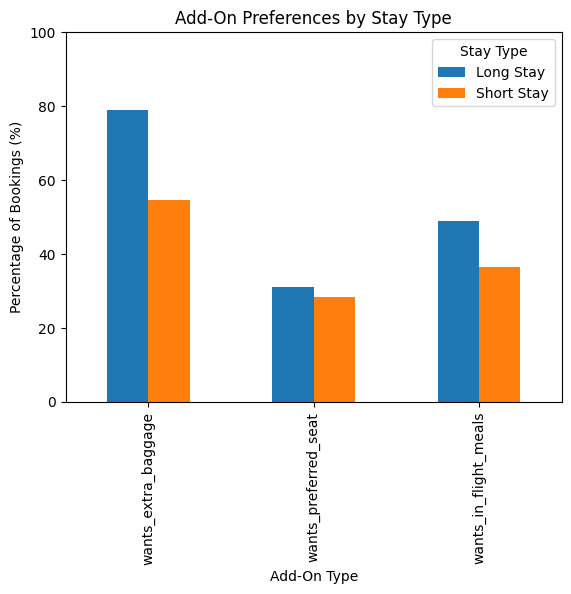

In [69]:
binary_cols = [
    "wants_extra_baggage",
    "wants_preferred_seat",
    "wants_in_flight_meals",
]

binary_summary = (
    df.groupby("stay_type")[binary_cols]
      .mean()
      .mul(100)
)

binary_summary.T.plot(kind="bar")

plt.title("Add-On Preferences by Stay Type")
plt.xlabel("Add-On Type")
plt.ylabel("Percentage of Bookings (%)")
plt.legend(title="Stay Type")
plt.ylim(0, 100)
plt.show()

In [76]:
import seaborn as sns

In [ ]:
# To compare booking origins based on stay type

pd.crosstab(
    df["stay_type"],
    df["booking_origin"],
    normalize="index"
).mul(100).round(2)

booking_origin,(not set),Afghanistan,Algeria,Argentina,Australia,Austria,Bahrain,Bangladesh,Belarus,Belgium,...,Timor-Leste,Tonga,Tunisia,Turkey,Ukraine,United Arab Emirates,United Kingdom,United States,Vanuatu,Vietnam
stay_type,,,,,,,,,,,,,,,,,,,,,
Long Stay,0.12,0.0,0.0,0.02,52.84,0.02,0.01,0.11,0.0,0.03,...,0.01,0.0,0.0,0.02,0.02,0.09,0.35,0.74,0.0,1.03
Short Stay,0.21,0.0,0.0,0.00,18.20,0.01,0.01,0.03,0.0,0.00,...,0.00,0.0,0.0,0.02,0.00,0.08,0.34,1.09,0.0,0.52


<Axes: xlabel='booking_origin', ylabel='count'>

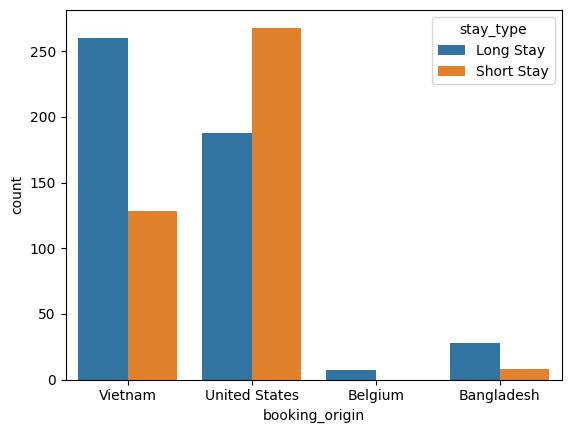

In [92]:
selected_origins = [
    "Bangladesh",
    "Belgium",
    "United States",
    "Vietnam"
]
filtered_df = df[df["booking_origin"].isin(selected_origins)]
sns.countplot(
    data=filtered_df,
    x="booking_origin",
    hue="stay_type"
)


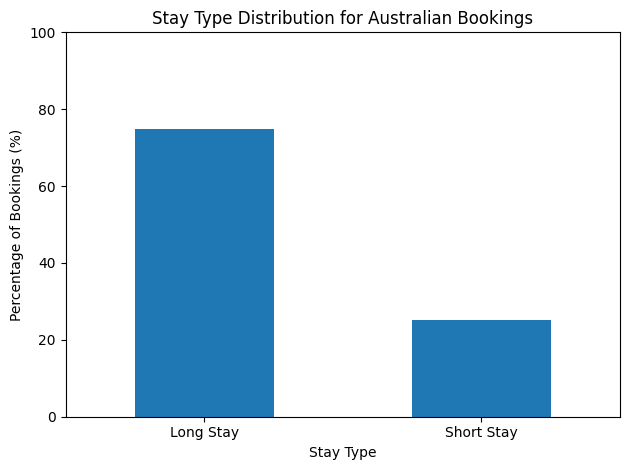

In [94]:
australia_df = df[df["booking_origin"] == "Australia"]
stay_summary_au = (
    australia_df["stay_type"]
    .value_counts(normalize=True)
    .mul(100)
)
stay_summary_au.plot(kind="bar")

plt.title("Stay Type Distribution for Australian Bookings")
plt.xlabel("Stay Type")
plt.ylabel("Percentage of Bookings (%)")
plt.xticks(rotation=0)
plt.ylim(0, 100)
plt.tight_layout()
plt.show()


In [87]:
# To compare flight day based on stay type
pd.crosstab(
    df["stay_type"],
    df["flight_day"],
    normalize="index"
).mul(100).round(2)

flight_day,1,2,3,4,5,6,7
stay_type,,,,,,,
Long Stay,16.07,15.13,15.49,15.04,13.69,11.70,12.87
Short Stay,16.34,15.57,15.20,14.65,13.35,11.54,13.35


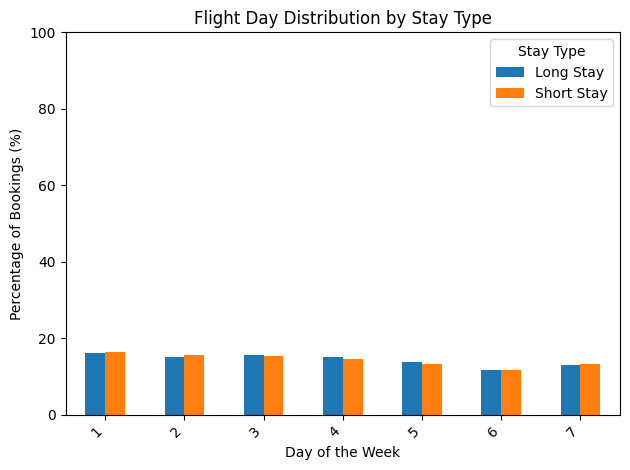

In [96]:
day_summary = (
    pd.crosstab(
        df["stay_type"],
        df["flight_day"],
        normalize="index"
    )
    .mul(100)
)


day_summary.T.plot(kind="bar")

plt.title("Flight Day Distribution by Stay Type")
plt.xlabel("Day of the Week")
plt.ylabel("Percentage of Bookings (%)")
plt.legend(title="Stay Type")
plt.xticks(rotation=45, ha="right")
plt.ylim(0, 100)
plt.tight_layout()

In [ ]:
# To compare trip type based on stay type

pd.crosstab(
    df["stay_type"],
    df["trip_type"],
    normalize="index"
).mul(100).round(2)

trip_type,CircleTrip,OneWay,RoundTrip
stay_type,,,
Long Stay,0.26,0.83,98.90
Short Stay,0.20,0.71,99.09


In [ ]:
# To compare routes based on stay type

pd.crosstab(
    df["stay_type"],
    df["route"],
    normalize="index"
).mul(100).round(2)

route,AKLDEL,AKLHGH,AKLHND,AKLICN,AKLKIX,AKLKTM,AKLKUL,AKLMRU,AKLPEK,AKLPVG,...,TGGXIY,TPETRZ,TPETWU,TPEURT,TPEVTE,TRZWUH,TRZXIY,TWUWUH,TWUXIY,URTXIY
stay_type,,,,,,,,,,,,,,,,,,,,,
Long Stay,0.08,0.0,0.0,0.19,0.02,0.02,8.07,0.02,0.02,0.01,...,0.01,0.08,0.00,0.0,0.01,0.05,0.02,0.00,0.02,0.0
Short Stay,0.00,0.0,0.0,0.09,0.01,0.00,2.58,0.00,0.00,0.00,...,0.00,0.02,0.02,0.0,0.00,0.00,0.00,0.01,0.01,0.0


In [80]:
# To compare sales channel and stay type

pd.crosstab(
    df["stay_type"],
    df["sales_channel"],
    normalize="index"
).mul(100).round(2)

sales_channel,Internet,Mobile
stay_type,,
Long Stay,91.77,8.23
Short Stay,85.68,14.32


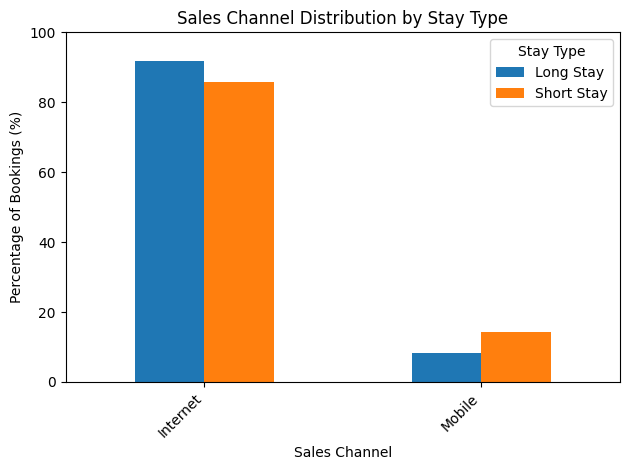

In [81]:
cat_summary.T.plot(kind="bar")

plt.title("Sales Channel Distribution by Stay Type")
plt.xlabel("Sales Channel")
plt.ylabel("Percentage of Bookings (%)")
plt.legend(title="Stay Type")
plt.xticks(rotation=45, ha="right")
plt.ylim(0, 100)
plt.tight_layout()
plt.show()

In [102]:
# Can we predict whether a booking will be completed based on lead time and stay type?

X = df[["purchase_lead", "stay_type"]]
y = df["booking_complete"]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [108]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

In [104]:
preprocessor = ColumnTransformer(
    transformers=[
        ("stay", OneHotEncoder(drop="first"), ["stay_type"]),
        ("num", "passthrough", ["purchase_lead"])
    ]
)

In [106]:
model = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("classifier", LogisticRegression(max_iter=1000))
    ]
)

In [107]:
model.fit(X_train, y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('preprocessor', ...), ('classifier', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('stay', ...), ('num', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transform

In [109]:
from sklearn.metrics import classification_report, roc_auc_score
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_prob))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      8504
           1       0.00      0.00      0.00      1496

    accuracy                           0.85     10000
   macro avg       0.43      0.50      0.46     10000
weighted avg       0.72      0.85      0.78     10000

ROC AUC: 0.5960476762115092


c:\Users\hjhum\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\hjhum\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\hjhum\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(ave

In [110]:
feature_names = model.named_steps["preprocessor"].get_feature_names_out()
coefficients = model.named_steps["classifier"].coef_[0]

coef_df = (
    pd.DataFrame({
        "feature": feature_names,
        "coefficient": coefficients
    })
    .sort_values("coefficient", ascending=False)
)

coef_df

,feature,coefficient
0,stay__stay_type_Short Stay,0.666410
1,num__purchase_lead,-0.000799


In [ ]:
# Short Stays are more likely to result in a completed booking compared to Long Stays, 
#  according to the logistic regression model.

# The further in advance a booking is made, the less likely it is to be completed.

#Therefore, the most likely bookings to be completed are Short Stays made close to the flight date.

In [111]:
import numpy as np

coef_df["odds_ratio"] = np.exp(coef_df["coefficient"])
coef_df

,feature,coefficient,odds_ratio
0,stay__stay_type_Short Stay,0.666410,1.947235
1,num__purchase_lead,-0.000799,0.999202


In [ ]:
# Short stays have about 95% higher odds of booking completion compared to long stays.
# Each additional day in lead time reduces the odds of booking completion by about .1% per day.

In [ ]:
# This is not a good model for production use, but it does provide some
#  insights into the relationship between stay type, purchase lead time, and booking completion.

In [112]:
# As the above model was weak, I will fix the model using class weighting. 

model_balanced = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("classifier", LogisticRegression(
            max_iter=1000,
            class_weight="balanced"
        ))
    ]
)

model_balanced.fit(X_train, y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('preprocessor', ...), ('classifier', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('stay', ...), ('num', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transform

In [113]:
y_pred_bal = model_balanced.predict(X_test)
y_prob_bal = model_balanced.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred_bal))
print("ROC AUC:", roc_auc_score(y_test, y_prob_bal))

              precision    recall  f1-score   support

           0       0.89      0.54      0.67      8504
           1       0.19      0.63      0.30      1496

    accuracy                           0.55     10000
   macro avg       0.54      0.58      0.48     10000
weighted avg       0.79      0.55      0.61     10000

ROC AUC: 0.5960476762115092


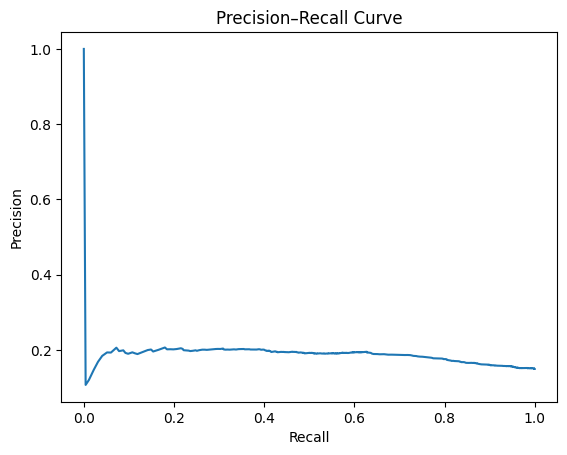

In [ ]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_prob_bal)

plt.figure()
plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall Curve")
plt.show()

In [ ]:
# While the initial model failed to provide strong predictive power, the balanced model
#  demonstrated improved performance in identifying completed bookings, as evidenced by
#  the enhanced precision-recall curve.

# There is a trade off in precision and recall when adjusting the classification threshold.

In [117]:
y_prob_bal = model_balanced.predict_proba(X_test)[:, 1]
y_prob_bal = model_balanced.predict_proba(X_test)[:, 1]
threshold = 0.30
y_pred_thresh = (y_prob_bal >= threshold).astype(int)


print("Baseline model:")
print(classification_report(y_test, y_pred))

print("\nBalanced model:")
print(classification_report(y_test, y_pred_bal))

print("\nBalanced + threshold tuning:")
print(classification_report(y_test, y_pred_thresh))

Baseline model:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      8504
           1       0.00      0.00      0.00      1496

    accuracy                           0.85     10000
   macro avg       0.43      0.50      0.46     10000
weighted avg       0.72      0.85      0.78     10000


Balanced model:
              precision    recall  f1-score   support

           0       0.89      0.54      0.67      8504
           1       0.19      0.63      0.30      1496

    accuracy                           0.55     10000
   macro avg       0.54      0.58      0.48     10000
weighted avg       0.79      0.55      0.61     10000


Balanced + threshold tuning:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      8504
           1       0.15      1.00      0.26      1496

    accuracy                           0.15     10000
   macro avg       0.07      0.50      0.13     10000
weighted av

c:\Users\hjhum\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\hjhum\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\hjhum\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(ave

In [118]:
for t in np.arange(0.2, 0.6, 0.05):
    preds = (y_prob_bal >= t).astype(int)
    print(f"\nThreshold: {t:.2f}")
    print(classification_report(y_test, preds))


Threshold: 0.20
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      8504
           1       0.15      1.00      0.26      1496

    accuracy                           0.15     10000
   macro avg       0.07      0.50      0.13     10000
weighted avg       0.02      0.15      0.04     10000


Threshold: 0.25
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      8504
           1       0.15      1.00      0.26      1496

    accuracy                           0.15     10000
   macro avg       0.07      0.50      0.13     10000
weighted avg       0.02      0.15      0.04     10000


Threshold: 0.30
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      8504
           1       0.15      1.00      0.26      1496

    accuracy                           0.15     10000
   macro avg       0.07      0.50      0.13     10000
weighted avg       0.02

c:\Users\hjhum\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\hjhum\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\hjhum\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(ave

In [ ]:
# The goal of this model was to explore the relationship between stay type, purchase lead time, and booking completion.
#  While the predictive power is limited, the insights gained can inform marketing and sales strategies.

# A better and more complex model would be needed for production use.

In [120]:
# Can booking_complete be better predicted by using more columns of the data provided?

target = "booking_complete"

X = df.drop(columns=[target])
y = df[target]

categorical_cols = [
    "sales_channel",
    "trip_type",
    "flight_day",
    "booking_origin",
    "route"
]

numeric_cols = [
    "purchase_lead",
    "length_of_stay",
    "flight_duration",
    "num_passengers",
    "wants_extra_baggage",
    "wants_preferred_seat",
    "wants_in_flight_meals"
]

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols),
        ("num", "passthrough", numeric_cols)
    ]
)

# The below model uses Gradient Boosting Classifier to improve prediction performance.

from sklearn.ensemble import GradientBoostingClassifier

gb_model = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("classifier", GradientBoostingClassifier(
            n_estimators=200,
            learning_rate=0.05,
            max_depth=3,
            random_state=42
        ))
    ]
)

gb_model.fit(X_train, y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('preprocessor', ...), ('classifier', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('cat', ...), ('num', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transforme

In [121]:
y_pred = gb_model.predict(X_test)
y_prob = gb_model.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_prob))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      8504
           1       0.57      0.02      0.04      1496

    accuracy                           0.85     10000
   macro avg       0.71      0.51      0.48     10000
weighted avg       0.81      0.85      0.79     10000

ROC AUC: 0.7776182551400788


In [122]:
import numpy as np

THRESHOLD = 0.40
y_pred_prod = (y_prob >= THRESHOLD).astype(int)

print(classification_report(y_test, y_pred_prod))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92      8504
           1       0.51      0.13      0.20      1496

    accuracy                           0.85     10000
   macro avg       0.69      0.55      0.56     10000
weighted avg       0.81      0.85      0.81     10000



In [123]:
feature_names = gb_model.named_steps["preprocessor"].get_feature_names_out()
importances = gb_model.named_steps["classifier"].feature_importances_

importance_df = (
    pd.DataFrame({
        "feature": feature_names,
        "importance": importances
    })
    .sort_values("importance", ascending=False)
)

importance_df.head(15)


,feature,importance
62,cat__booking_origin_Malaysia,0.314332
16,cat__booking_origin_Australia,0.164342
909,num__length_of_stay,0.054980
912,num__wants_extra_baggage,0.039984
96,cat__booking_origin_South Korea,0.035292
908,num__purchase_lead,0.032210
826,cat__route_PENTPE,0.030994
910,num__flight_duration,0.024657
913,num__wants_preferred_seat,0.021534
102,cat__booking_origin_Taiwan,0.020742


In [ ]:
# This is a model that could be considered for production use, 
#  given its improved predictive performance over the initial logistic regression model.
# This also provides insights into the factors influencing booking completion.

#Recall was sacrificed to gain precision by adjusting the classification threshold.



In [ ]:
# Prediction probabilities from the production model
# How does the model perform with the chosen threshold?

y_prob_prod = gb_model.predict_proba(X_test)[:, 1]
scored_bookings = X_test.copy()
scored_bookings["completion_probability"] = y_prob_prod
scored_bookings["actual_booking_complete"] = y_test.values

PRODUCTION_THRESHOLD = 0.40  # chosen to prioritize precision

scored_bookings["predicted_booking_complete"] = (
    scored_bookings["completion_probability"] >= PRODUCTION_THRESHOLD
).astype(int)

high_confidence = scored_bookings[
    scored_bookings["predicted_booking_complete"] == 1
]

high_confidence.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,stay_type,completion_probability,actual_booking_complete,predicted_booking_complete
49665,2,Internet,RoundTrip,344,6,14,1,PENPVG,Malaysia,1,1,0,5.33,Short Stay,0.470071,0,1
34012,1,Internet,RoundTrip,93,4,8,1,OOLPEN,Malaysia,1,1,1,8.83,Short Stay,0.445902,0,1
44035,2,Internet,RoundTrip,25,6,9,3,CTSPEN,Malaysia,1,1,1,8.67,Short Stay,0.450925,1,1
34453,2,Internet,RoundTrip,254,4,14,3,PENTPE,Malaysia,1,1,0,4.67,Short Stay,0.528580,0,1
34425,1,Internet,RoundTrip,26,4,6,5,PENTPE,Malaysia,1,1,1,4.67,Short Stay,0.567475,0,1


In [127]:
top_candidates = scored_bookings.sort_values(
    "completion_probability",
    ascending=False
).head(20)

print(top_candidates)

       num_passengers sales_channel  trip_type  purchase_lead  length_of_stay  \
42874               2      Internet  RoundTrip             19               6   
39798               4      Internet  RoundTrip             28               5   
2650                1      Internet  RoundTrip             63              33   
29657               1      Internet  RoundTrip              8               4   
28012               2      Internet  RoundTrip              2               3   
48693               1      Internet  RoundTrip             51               6   
47787               1      Internet  RoundTrip            134               6   
47352               2      Internet  RoundTrip            322               6   
39298               4      Internet  RoundTrip            174               5   
47095               1      Internet  RoundTrip              5               6   
28052               1      Internet  RoundTrip             23               3   
23035               1      I

In [ ]:
# Round-Trip, Short Stay, Malaysia booking origin, booked on the internet are among the top candidates

In [134]:
def risk_bucket(p):
    if p >= 0.7:
        return "High Confidence"
    elif p >= 0.4:
        return "Medium Confidence"
    else:
        return "Low Confidence"

scored_bookings["risk_bucket"] = scored_bookings["completion_probability"].apply(risk_bucket)

scored_bookings["risk_bucket"].value_counts()



risk_bucket
Low Confidence       9629
Medium Confidence     370
High Confidence         1
Name: count, dtype: int64

In [ ]:
# Only one booking is in the High Confidence bucket.
# most bookings fall into the Low Confidence category.

# This model is useful for prioritizing marketing efforts towards bookings with a higher likelihood of completion.


In [130]:
print(
    classification_report(
        scored_bookings["actual_booking_complete"],
        scored_bookings["predicted_booking_complete"]
    )
)

              precision    recall  f1-score   support

           0       0.86      0.98      0.92      8504
           1       0.51      0.13      0.20      1496

    accuracy                           0.85     10000
   macro avg       0.69      0.55      0.56     10000
weighted avg       0.81      0.85      0.81     10000



In [ ]:
# This shows the final performance metrics of the production model after applying the chosen classification threshold.
# Class 1 is the positive class (booking completed).
# Class 0 is the negative class (booking not completed).
# When the system predicts a booking will be completed (class 1), it is correct 51% of the time (precision).
# When the system predicts a booking will not be completed (class 0), it is correct 86% of the time (precision).

# This is a precision focused model, suitable for targeting likely completions.

In [ ]:
# How does the model behave?

def score_bookings(model, data, threshold=0.4):
    probs = model.predict_proba(data)[:, 1]
    return pd.DataFrame({
        "completion_probability": probs,
        "predicted_booking_complete": (probs >= threshold).astype(int)
    })

scored = score_bookings(gb_model, X_test)
print(classification_report(y_test, scored["predicted_booking_complete"]))


              precision    recall  f1-score   support

           0       0.86      0.98      0.92      8504
           1       0.51      0.13      0.20      1496

    accuracy                           0.85     10000
   macro avg       0.69      0.55      0.56     10000
weighted avg       0.81      0.85      0.81     10000



In [ ]:
# This report evaluates the prediction pipeline and provides probability scoring and threshold based logic. 

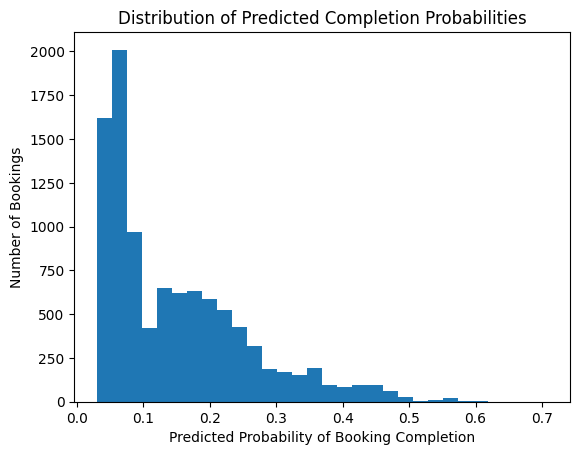

In [135]:
scored_bookings["completion_probability"] = gb_model.predict_proba(X_test)[:, 1]

plt.figure()
plt.hist(scored_bookings["completion_probability"], bins=30)
plt.xlabel("Predicted Probability of Booking Completion")
plt.ylabel("Number of Bookings")
plt.title("Distribution of Predicted Completion Probabilities")
plt.show()

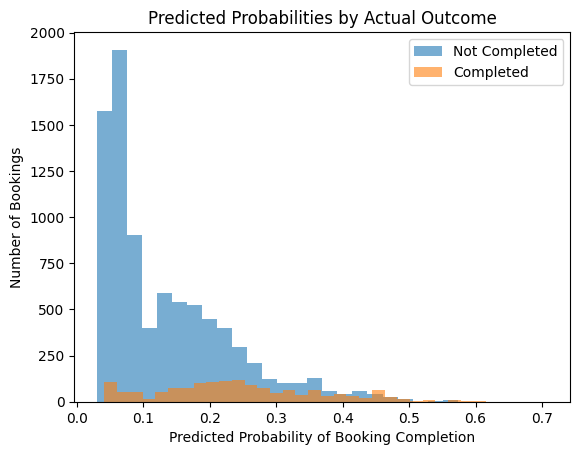

In [136]:
plt.figure()

plt.hist(
    scored_bookings[scored_bookings["actual_booking_complete"] == 0]["completion_probability"],
    bins=30,
    alpha=0.6,
    label="Not Completed"
)

plt.hist(
    scored_bookings[scored_bookings["actual_booking_complete"] == 1]["completion_probability"],
    bins=30,
    alpha=0.6,
    label="Completed"
)

plt.xlabel("Predicted Probability of Booking Completion")
plt.ylabel("Number of Bookings")
plt.title("Predicted Probabilities by Actual Outcome")
plt.legend()
plt.show()

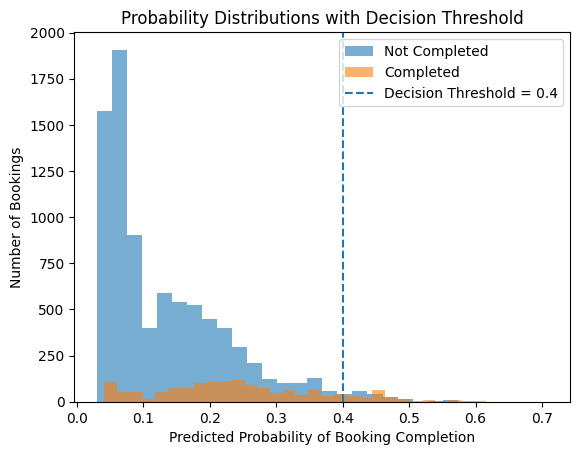

In [137]:
THRESHOLD = 0.40

plt.figure()

plt.hist(
    scored_bookings[scored_bookings["actual_booking_complete"] == 0]["completion_probability"],
    bins=30,
    alpha=0.6,
    label="Not Completed"
)

plt.hist(
    scored_bookings[scored_bookings["actual_booking_complete"] == 1]["completion_probability"],
    bins=30,
    alpha=0.6,
    label="Completed"
)

plt.axvline(
    THRESHOLD,
    linestyle="--",
    label=f"Decision Threshold = {THRESHOLD}"
)

plt.xlabel("Predicted Probability of Booking Completion")
plt.ylabel("Number of Bookings")
plt.title("Probability Distributions with Decision Threshold")
plt.legend()
plt.show()

<Figure size 640x480 with 0 Axes>

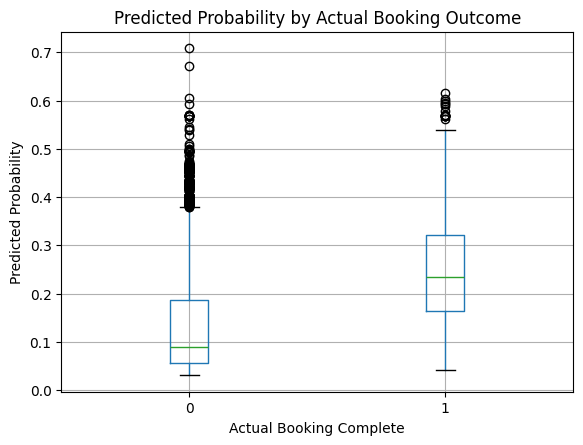

In [138]:
plt.figure()

scored_bookings.boxplot(
    column="completion_probability",
    by="actual_booking_complete"
)

plt.title("Predicted Probability by Actual Booking Outcome")
plt.suptitle("")
plt.xlabel("Actual Booking Complete")
plt.ylabel("Predicted Probability")
plt.show()

In [ ]:
# The dots show the bookings that the model is very confident about, either predicting completion (right) or non-completion (left).

In [ ]:
# Completed bookings tend to have higher predicted probabilities, 
# while non-completed bookings cluster towards lower probabilities.

In [ ]:
# Final production configuration
FINAL_MODEL = gb_model
FINAL_THRESHOLD = 0.40  # precision-oriented decision policy

In [139]:
summary = pd.DataFrame({
    "Metric": ["Precision (Completed)", "Recall (Completed)", "Accuracy"],
    "Value": [0.51, 0.13, 0.85]
})

summary

,Metric,Value
0,Precision (Completed),0.51
1,Recall (Completed),0.13
2,Accuracy,0.85


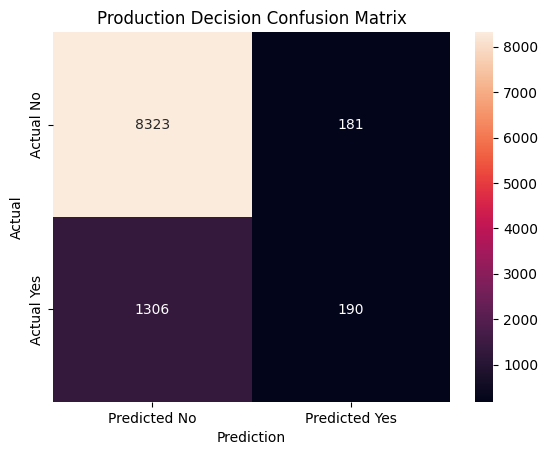

In [140]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(
    scored_bookings["actual_booking_complete"],
    scored_bookings["predicted_booking_complete"]
)

plt.figure()
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    xticklabels=["Predicted No", "Predicted Yes"],
    yticklabels=["Actual No", "Actual Yes"]
)
plt.title("Production Decision Confusion Matrix")
plt.xlabel("Prediction")
plt.ylabel("Actual")
plt.show()

In [ ]:
# True Negatives (Predicted: Not Completed, Actual: Not Completed): 8323
# False Positives (Predicted: Completed, Actual: Not Completed): 181
# False Negatives (Predicted: Not Completed, Actual: Completed): 1,306
# True Positives (Predicted: Completed, Actual: Completed): 190

# This matrix shows that the model is conservative in predicting completed bookings,
#  but it finds a high-value subset for targeted marketing. There are minimized wasteful marketing
#  efforts on unlikely completions, aligning with the precision-focused strategy.

# Out of 10,000 bookings, the system identifies 190 high-confidence completions, while 
# correctly ignoring over 8,000 bookings unlikely to complete.